In [2]:
from numpy import *
from math import e

def newtdd(x,y):
    n = len(x)
    v = zeros((n,n))
    for j in range(n):
        v[j,0] = y[j] # Fill in y column of Newton triangle
    for i in range(1,n): # For column i,
        for j in range(n-i): # 1:n+1-i   # fill in column from top to bottom
            # print j,i," ",j+1,i-1," ", j,i-1," ",j+i," ",j
            v[j,i] = (v[j+1,i-1]-v[j,i-1])/(x[j+i]-x[j])
    c = v[0,:].copy() # Read along top of triangle for output coefficients
    return c

In [8]:
def Newtonpolynomial(c,x,xk):
    '''
    Computes Newton's polynomial given divided differences
    Input: c: coefficients of interpolating polynomial, 
           x: value to be computed, xk: interpolating nodes
    Output: value of the polynomial at x, P(x)
    '''
    n = len(c) - 1
    P = c[n]
    for k in range(n-1, -1, -1):
        P = c[k] + (x-xk[k])*P
    return P

In [18]:
xk1 = [i/5 for i in range(-5,6)]
f = list(map(lambda x: e**(abs(x)), xk1))
c1 = newtdd(xk1,f)


def generate_chebychev_nodes(n): # n = num of nodes
    k = [i for i in range(0, n)] # total n nodes
    return list(map(lambda x: cos(pi*(x+0.5)/(n)), k))

xk2 = generate_chebychev_nodes(11)
f = list(map(lambda x: e**(abs(x)), xk2))
c2 = newtdd(xk2,f)

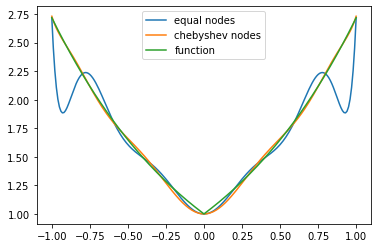

In [19]:
import matplotlib.pyplot as plt

x = [i/100 for i in range(-100,101)]
p1 = [Newtonpolynomial(c1,i,xk1) for i in x]
p2 = [Newtonpolynomial(c2,i,xk2) for i in x]
f = [e**(abs(i)) for i in x]


plt.plot(x, p1, label = "Equal nodes")
plt.plot(x, p2, label = "Chebyshev nodes")
plt.plot(x, f, label = "Function")
plt.legend()